In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [84]:
# Load your dataset
data = pd.read_csv('salary_dataset.csv')

In [85]:
print(data.isnull().sum())  # Check for missing values in each column

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Salary_lpa             0
dtype: int64


In [86]:
data.dropna(inplace=True)  # Remove rows with missing values

In [87]:
print(data.isnull().sum())  # Check for missing values in each column


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Salary_lpa             0
dtype: int64


In [88]:
# Assign column 'd' to X and column 'e' to y
X = data[['Years of Experience']]  # Use double brackets to keep it as a 2D array
y = data['Salary_lpa']    # y can remain a 1D array

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Normalize the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [91]:
X_train_normalized = scaler_X.fit_transform(X_train)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [92]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_normalized, y_train_normalized)

LinearRegression()

In [99]:
print("w =", model.coef_)
print("b=",  model.intercept_)

w = [[0.8087617]]
b= [3.1906542e-17]


In [70]:
new_value = np.array([[25]])  # Years of Experience

# Normalize the input
new_value_normalized = scaler_X.transform(new_value)

# Predict using the trained model
predicted_normalized = model.predict(new_value_normalized)

# Inverse transform the prediction to get back to the original scale
predicted_salary = scaler_y.inverse_transform(predicted_normalized.reshape(-1, 1))
predicted_salary

C:\Users\prave\.conda\envs\torch\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[28.20213034]])

In [71]:
# Make predictions
y_train_pred_normalized = model.predict(X_train_normalized)
y_test_pred_normalized = model.predict(scaler_X.transform(X_test))

In [72]:

# Inverse transform predictions to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)

In [73]:

# Calculate MSE for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

Training MSE: 13.79714025182595


In [76]:
y_test_pred = model.predict([[5]])
y_test_pred

array([[4.04380851]])

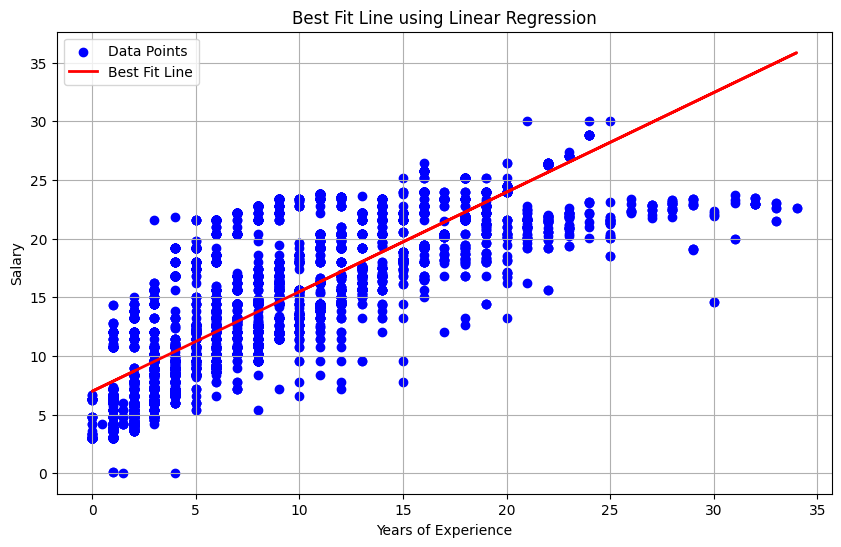

In [75]:

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # Original data points
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Best Fit Line')  # Best-fit line
plt.title('Best Fit Line using Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()
